In [2]:
from data_import import import_target_values, clean_up
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


clean_up()
file_path = import_target_values()

100%|██████████| 4.63M/4.63M [00:00<00:00, 12.9MB/s]

In [1]:
df_targ = pd.read_csv(file_path)

df_targ.describe()

NameError: name 'pd' is not defined

In [ ]:
# Are there any duplications 
print("Total duplicates: ", df_targ['GalaxyID'].duplicated().sum())

# Check uniqueness
print(f"Unique GalaxyIDs: {df_targ['GalaxyID'].nunique()} / {len(df_targ)} \n")

# any missing values 
for column in df_targ.columns:
    na_count = df_targ[column].isna().sum()
    if na_count != 0:
        print(f"{column}: {na_count} missing values")



# Column names and data types
print(df_targ.info())

#check if all values are between [0,1]
prob_col = [col for col in df_targ.columns[1:]]
invalid_val = df_targ[(df_targ[prob_col] < 0) | (df_targ[prob_col] > 1)].any(axis=1)
print(f"Rows with probabilities outside [0,1]:\n{df_targ[invalid_val]}")

Total duplicates:  0
Unique GalaxyIDs: 61578 / 61578 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61578 entries, 0 to 61577
Data columns (total 38 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   GalaxyID   61578 non-null  int64  
 1   Class1.1   61578 non-null  float64
 2   Class1.2   61578 non-null  float64
 3   Class1.3   61578 non-null  float64
 4   Class2.1   61578 non-null  float64
 5   Class2.2   61578 non-null  float64
 6   Class3.1   61578 non-null  float64
 7   Class3.2   61578 non-null  float64
 8   Class4.1   61578 non-null  float64
 9   Class4.2   61578 non-null  float64
 10  Class5.1   61578 non-null  float64
 11  Class5.2   61578 non-null  float64
 12  Class5.3   61578 non-null  float64
 13  Class5.4   61578 non-null  float64
 14  Class6.1   61578 non-null  float64
 15  Class6.2   61578 non-null  float64
 16  Class7.1   61578 non-null  float64
 17  Class7.2   61578 non-null  float64
 18  Class7.3   61578 non-null  floa

In [ ]:
# outlier check 
for col in df_targ.columns[1:]:
    quant1 = df_targ[col].quantile(0.25)
    quant3 = df_targ[col].quantile(0.75)
    iqr = quant3 - quant1
    outliers = df_targ[(df_targ[col] < (quant1- 1.5*iqr)) | (df_targ[col] > (quant3 + 1.5*iqr))]
    if (outliers['GalaxyID'].count()) > 0:
        print(f"IQR: {iqr}")
        print(f"Outliers in {col}: {outliers['GalaxyID'].count()}/{df_targ[col].count()}")

IQR: 0.034325499999999995
Outliers in Class1.3: 3189/61578
IQR: 0.0851605585
Outliers in Class2.1: 9443/61578
IQR: 0.13455454225000002
Outliers in Class3.1: 5992/61578
IQR: 0.3302310945
Outliers in Class4.1: 4344/61578
IQR: 0.26626368125
Outliers in Class4.2: 364/61578
IQR: 0.044375501750000004
Outliers in Class5.1: 7709/61578
IQR: 0.290133279
Outliers in Class5.2: 612/61578
IQR: 0.2845535645
Outliers in Class5.3: 401/61578
IQR: 0.05729438975
Outliers in Class5.4: 3905/61578
IQR: 0.26085625
Outliers in Class6.1: 3593/61578
IQR: 0.26085625
Outliers in Class6.2: 3593/61578
IQR: 0.2806786125
Outliers in Class7.1: 3234/61578
IQR: 0.30123348024999996
Outliers in Class7.2: 816/61578
IQR: 0.04913600875
Outliers in Class7.3: 10201/61578
IQR: 0.0277672095
Outliers in Class8.1: 7142/61578
IQR: 0.02516012375
Outliers in Class8.2: 3085/61578
IQR: 0.0461291
Outliers in Class8.3: 4038/61578
IQR: 0.04490667575
Outliers in Class8.4: 6383/61578
IQR: 0.08654063575
Outliers in Class8.5: 4603/61578
IQR: 0

/var/folders/51/q7wk1sc54ms0xz7vq4j4k4g80000gn/T/ipykernel_9471/234882376.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(5,3))


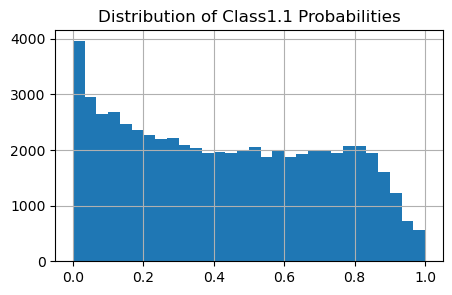

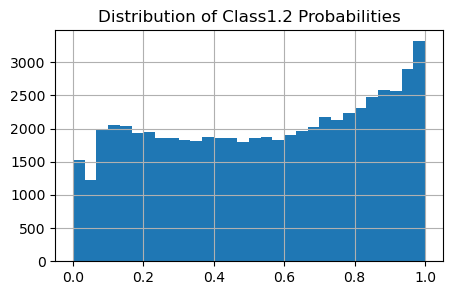

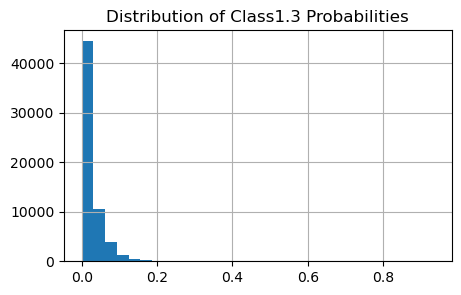

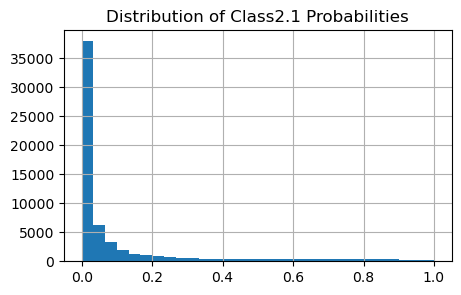

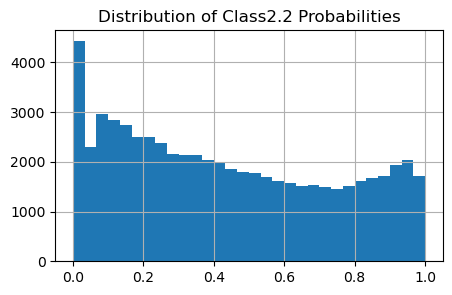

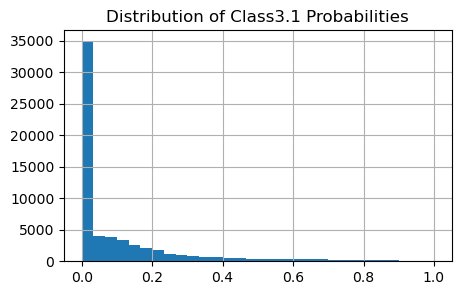

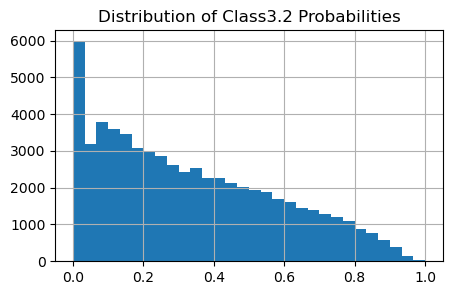

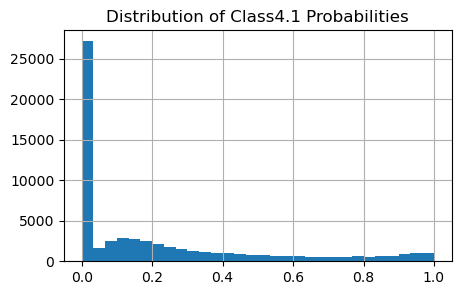

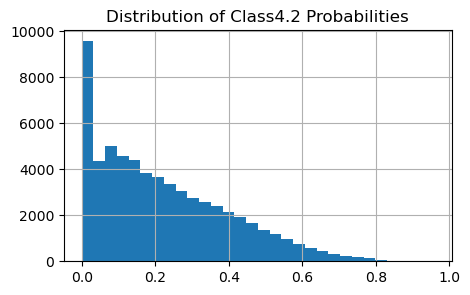

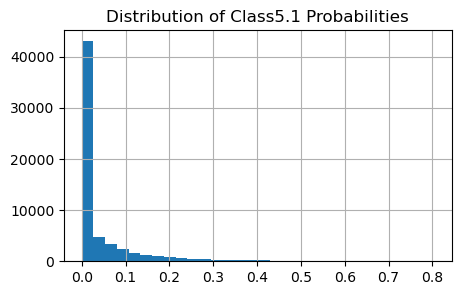

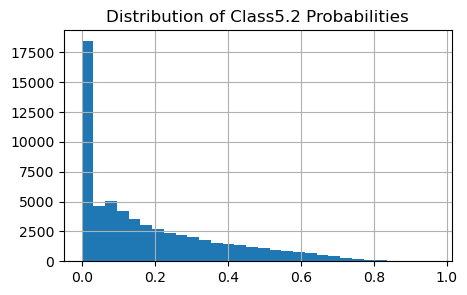

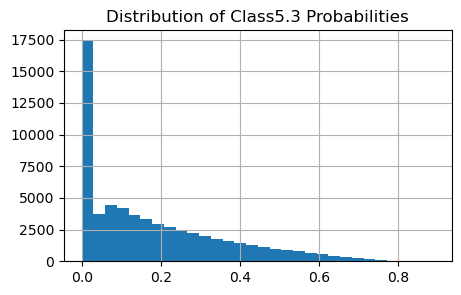

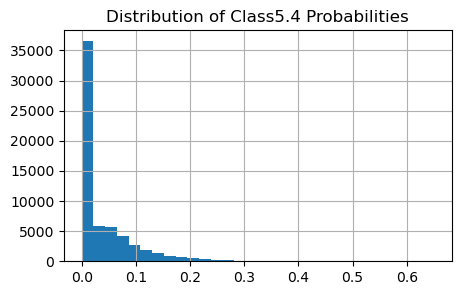

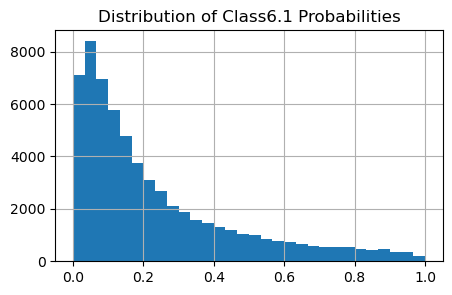

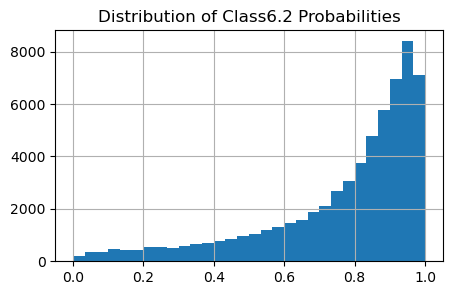

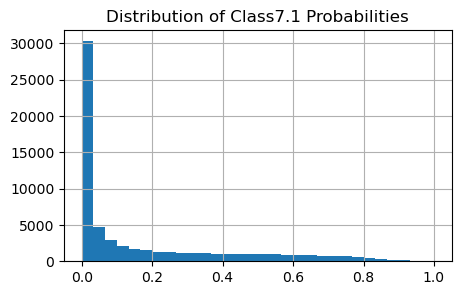

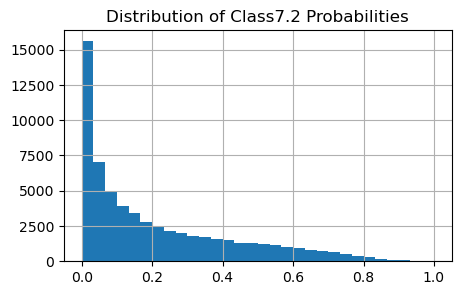

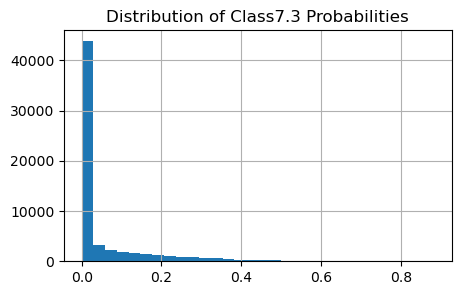

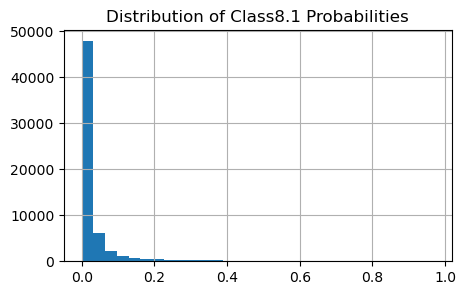

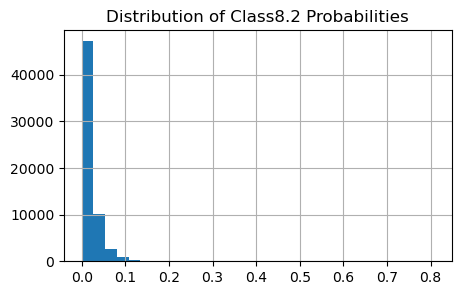

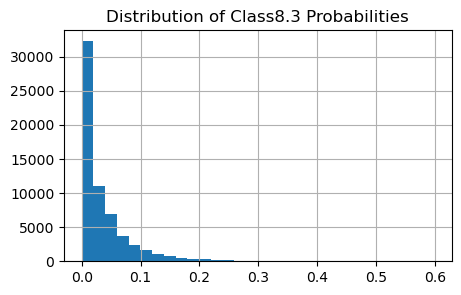

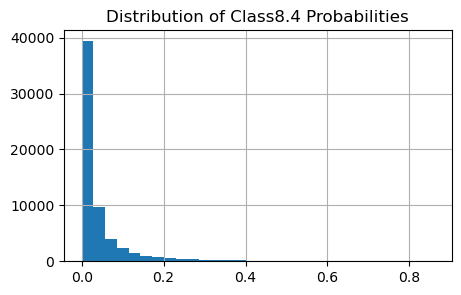

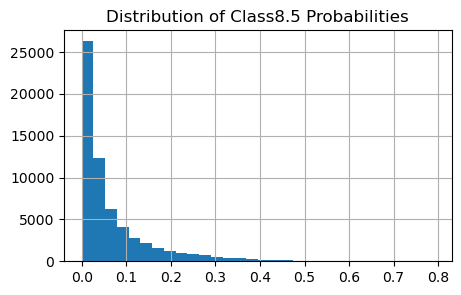

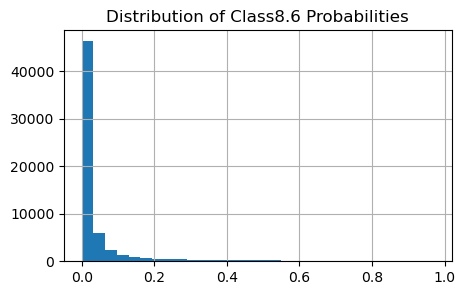

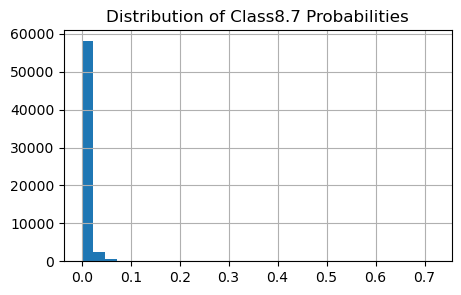

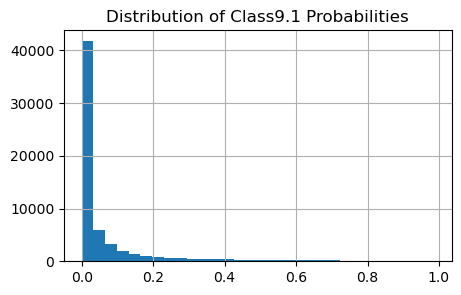

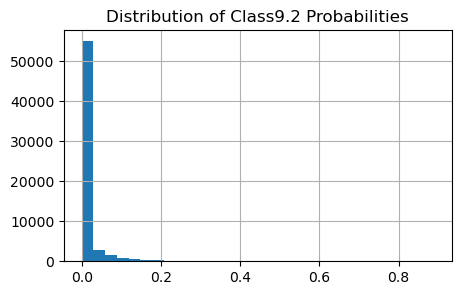

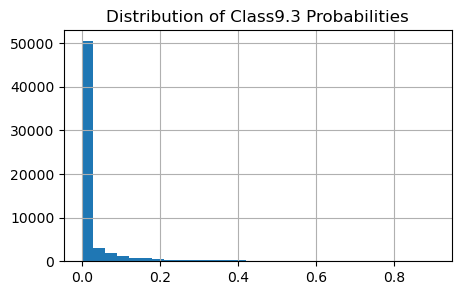

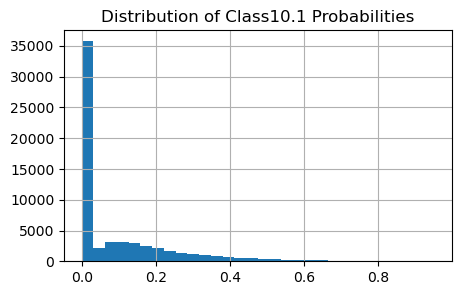

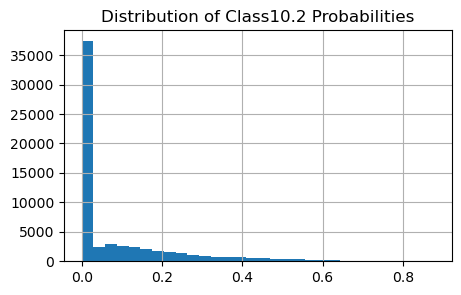

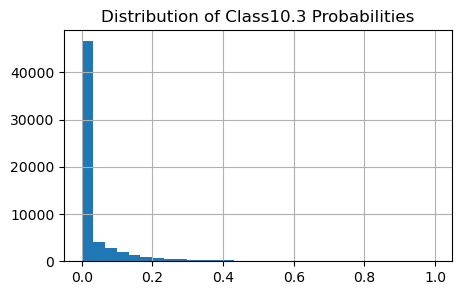

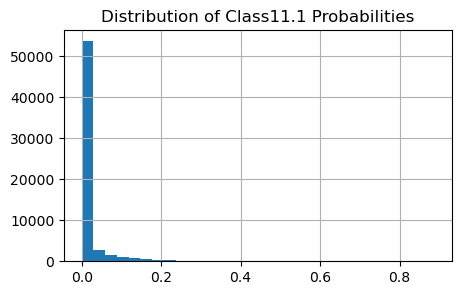

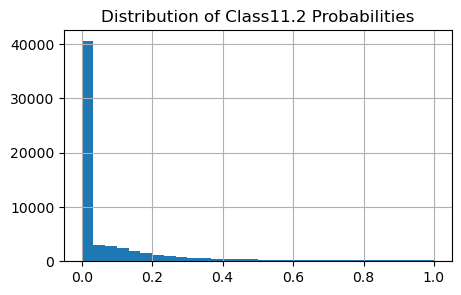

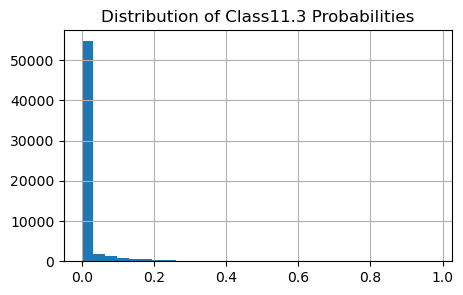

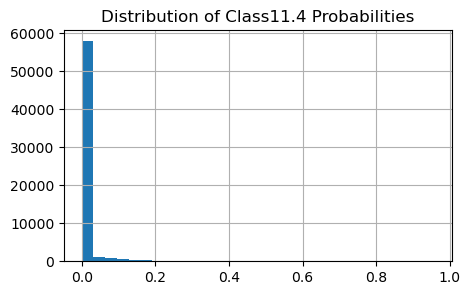

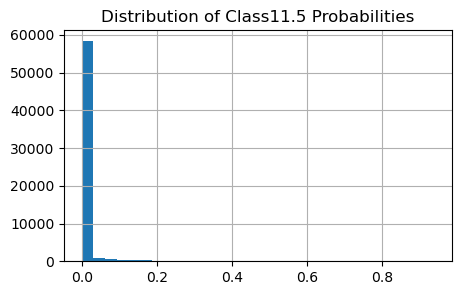

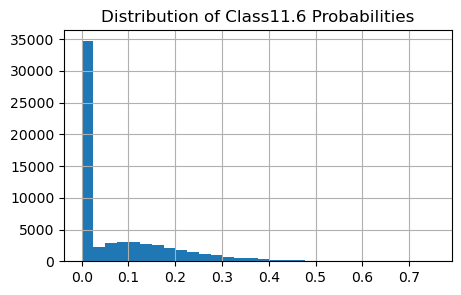

In [ ]:
for col in df_targ.columns[1:]:
    plt.figure(figsize=(5,3))
    plt.title(f"Distribution of {col} Probabilities")
    df_targ[col].hist(bins=30)
plt.show()

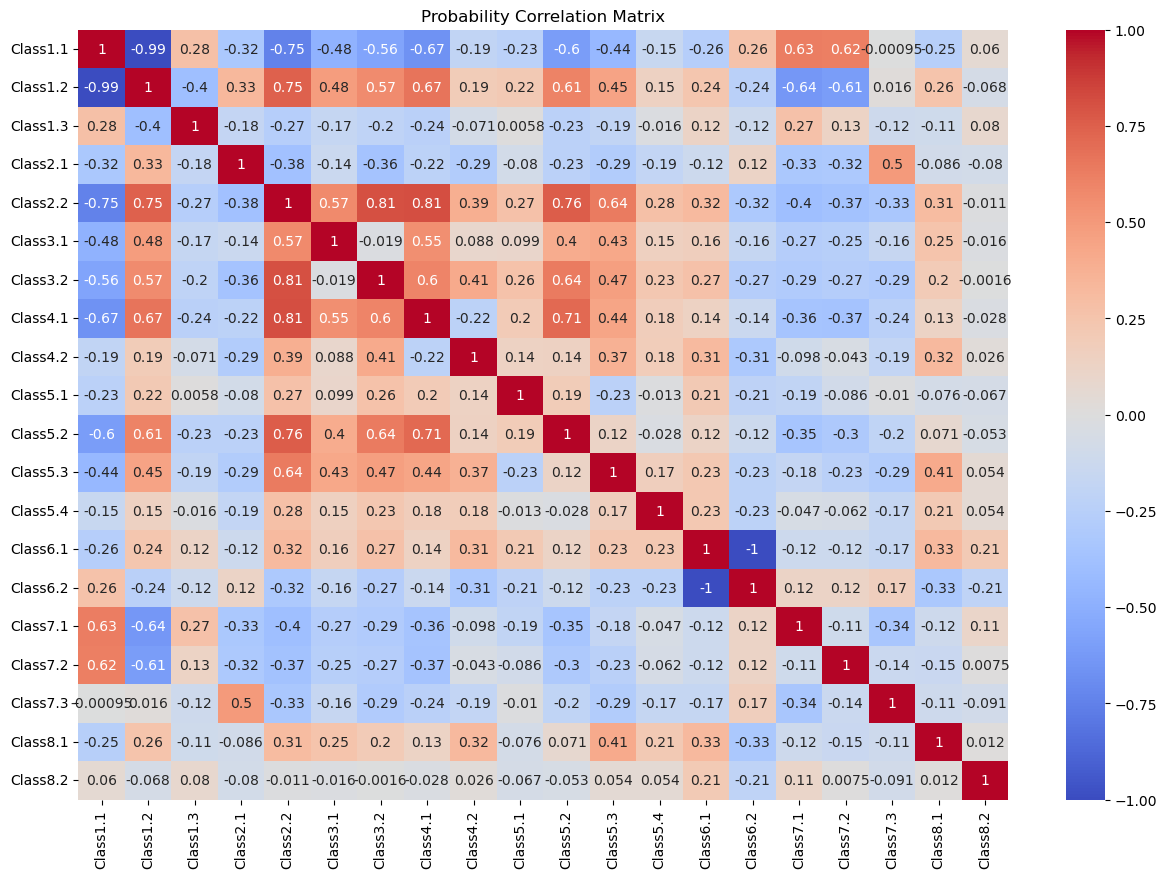

In [ ]:
corr_matrix = df_targ[prob_col[:20]].corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Probability Correlation Matrix")
plt.show()

In [ ]:
non_numeric = df_targ[prob_col].apply(lambda x: pd.to_numeric(x, errors='coerce')).isnull().sum()
print(f"Non-numeric values in probability columns:\n{non_numeric}")

Non-numeric values in probability columns:
Class1.1     0
Class1.2     0
Class1.3     0
Class2.1     0
Class2.2     0
Class3.1     0
Class3.2     0
Class4.1     0
Class4.2     0
Class5.1     0
Class5.2     0
Class5.3     0
Class5.4     0
Class6.1     0
Class6.2     0
Class7.1     0
Class7.2     0
Class7.3     0
Class8.1     0
Class8.2     0
Class8.3     0
Class8.4     0
Class8.5     0
Class8.6     0
Class8.7     0
Class9.1     0
Class9.2     0
Class9.3     0
Class10.1    0
Class10.2    0
Class10.3    0
Class11.1    0
Class11.2    0
Class11.3    0
Class11.4    0
Class11.5    0
Class11.6    0
dtype: int64


In [3]:
clean_up()